# Salary Prediction

In [1]:
#Importing all the neccesary libararies
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
sal = pd.read_csv(r'Salaries.csv')
sal

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [3]:
sal.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

#About the columns in the dataset

Rank: This column tells about the rank earned by the person basis on diffrent other factors

disipline:- it shows us the measure of work they have achived in evrything they have done

Years_since_phd: This column tells us that how many years completed after the person had done Phd. degree

Years_service: This column tells us about that how many years of experince he/she has in a company

Sex: This column given the sex-ratio of male vs female .

Salary: this is our Output or label column for prediction

# Checking for all the Null values

In [4]:
sal.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

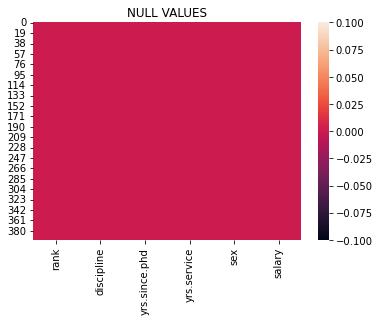

In [5]:
sns.heatmap(sal.isnull())
plt.title('NULL VALUES')
plt.show()

so we can see that there is no Null values present in this Dataset

# Performing  EDA

In [6]:
sal['sex'].value_counts()

Male      358
Female     39
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

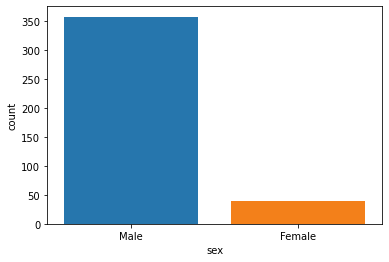

In [7]:
sns.countplot(sal['sex'], saturation=0.9, dodge=True)

so we have 358 males and only 39 females here

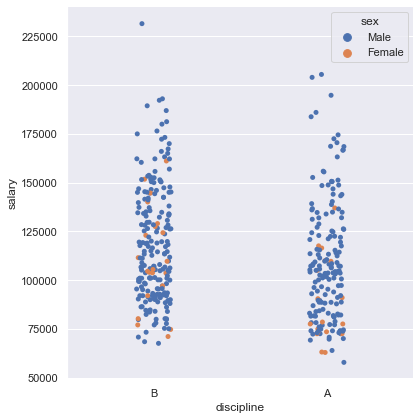

In [8]:
sns.set_theme(style="darkgrid")
sns.catplot(x="discipline", y="salary", hue="sex", data=sal,  height=6, aspect=1,legend_out=False)

Observations:

1. As we  can see  that according to discipline also we  have more  males salary and less female salary
2. As we can see  according  to  the discipline  we have more of males  in both  the  discipline A & B
3. The B  category  discipline has the Max amount  of salary than  A

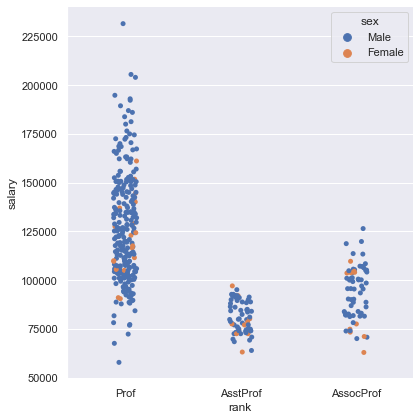

In [9]:
sns.set_theme(style="darkgrid")
sns.catplot(x="rank", y="salary", hue="sex", data=sal,  height=6, aspect=1,legend_out=False)

observations:
1.Here  we  can easily  identify  that in each of  the 3 ranks  we  have more number of males than that of 
     females

2. Here we  can say  that

 Prof-rank: has  the  highest salary counts
 
 Asstprof_rank: has  the lowest salary counts
 
 Assocprof_rank: has the medium salary counts.

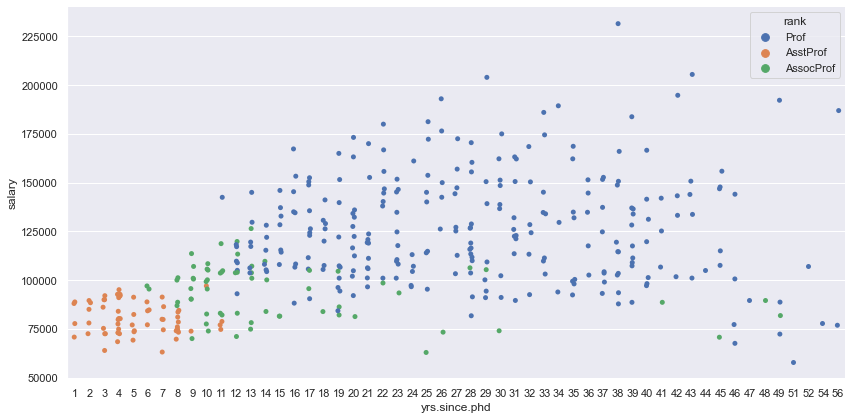

In [10]:
sns.set_theme(style="darkgrid")
sns.catplot(x="yrs.since.phd", y="salary", hue="rank", data=sal,  height=6, aspect=2,legend_out=False)

Observations:

 1 . As it  can be seen  that  the according  to increase  in  the years  of phd  completed  the  salary is 
       moving  up  simultaneously

2.  As it  can be seen  that the rank prof  is more  in case  of completition of degree Phd.

# Finding the Correlation

In [11]:
sal.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


In [12]:
sal.corr()['salary'].sort_values()

yrs.service      0.334745
yrs.since.phd    0.419231
salary           1.000000
Name: salary, dtype: float64

## Corelation heatmap

<AxesSubplot:>

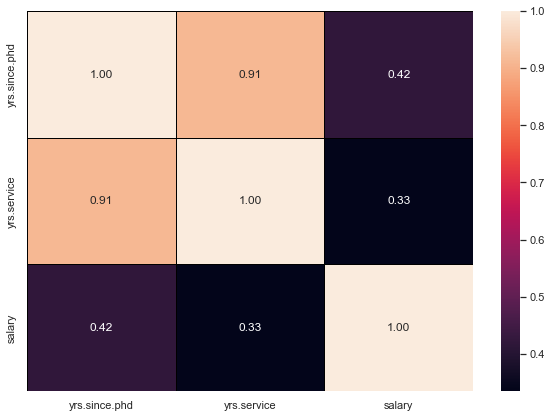

In [13]:
import matplotlib.pyplot  as plt
# making  the  canvas  size
plt.figure(figsize=(10,7))
sns.heatmap(sal.corr(),annot =True, linewidths=0.5, linecolor='black', fmt='.2f')

Observations:

1. yrs.since.phd  is 42% correlated to salary  which is a   good score
2. yrs.service  is 33% correlated  to salary  whcih is also a   good score

In [14]:
sal.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


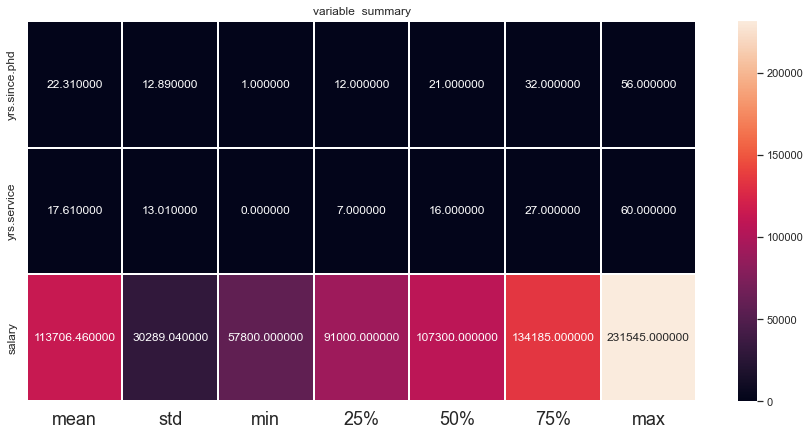

In [15]:
plt.figure(figsize=(15,7))
sns.heatmap(round(sal.describe()[1:].transpose(),2), linewidth =2, fmt='f', annot=True)
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title('variable  summary')
plt.show()

observations:

yrs.since.phd:
    mean=22.314681
    std= 12.887
    min= 1.0000
    max = 56.000

yrs.service:
    mean=17.6146
    std=13.006024
    min=0.000
    max= 60.000

salary:
    mean=113706.4584
    std= 30289.038
    min=57800.000
    max =231545.0000

In [16]:
# checking  the info   of  the Datatypes  of  all  the columns
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


# Outliers Checking

<AxesSubplot:xlabel='yrs.since.phd'>

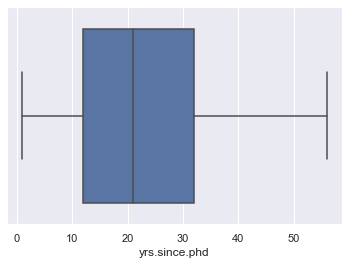

In [17]:
sns.boxplot(sal['yrs.since.phd'])

so we cannot see any outliers here

<AxesSubplot:xlabel='yrs.service'>

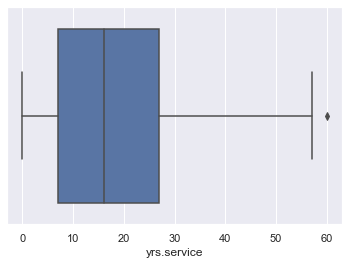

In [18]:
sns.boxplot(sal['yrs.service'])

so we can see very few outliers here

# Checking the Skewness in the Dataset

In [19]:
sal.skew()

yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

# Graph reprresentation of the columns

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

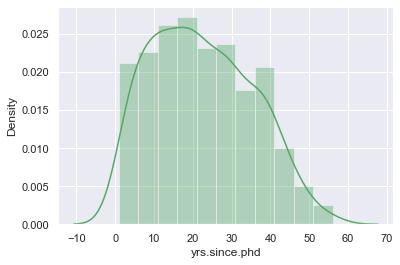

In [20]:
sns.distplot(sal['yrs.since.phd'], color ='g')

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

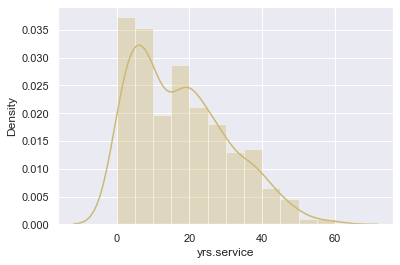

In [21]:
sns.distplot(sal['yrs.service'], color='y')

observations - As the skewness is normal here and yrs.since phd has no skewness only little skewness is there in col yrs.service

### Data Cleaning and preprocessing
#### Feature engineering (encoding)
labelEncoding the categorical columns

In [22]:
from sklearn.preprocessing  import LabelEncoder
le=LabelEncoder()
sal['rank']=le.fit_transform(sal['rank'])
sal['discipline']=le.fit_transform(sal['discipline'])
sal['sex']=le.fit_transform(sal['sex'])

In [23]:
sal.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500


so we have encoded all the categorical cols with the help of LabelEncoder

In [24]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
def calcvif(x):
    vif =pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [26]:
sal.drop(['yrs.since.phd'],axis=1, inplace=True)
sal.drop(['rank'], axis=1, inplace =True)
sal.drop(['discipline'], axis=1, inplace=True)
sal.drop(['sex'], axis=1, inplace=True)

So as we can see here that the col yrs.since.phd has high correlation and collinearity which may effect the model building thus we have to drop this now

# Outliers removal with Scipy

In [27]:
import scipy
from scipy.stats import zscore

z= np.abs(zscore(sal))
z

,yrs.service,salary
0,0.029669,0.860919
1,0.124300,1.966672
2,1.125098,1.122495
3,1.646343,0.042760
4,1.800312,0.918768
...,...,...
392,0.953483,0.350418
393,0.106654,1.218396
394,0.568560,0.395640
395,0.201284,0.607502


In [28]:
#setting  the threshold   limit  as  3  accordance  to  the  emprical  rule  
threshold=3
print(np.where(z>3))

(array([ 43, 131, 330, 364], dtype=int64), array([1, 0, 0, 1], dtype=int64))


In [29]:
len(np.where(z>3)[0])

4

In [30]:
z.iloc[364]

yrs.service    1.954281
salary         3.034410
Name: 364, dtype: float64

So we can see that when we are earching with index when can see that here in the row 364 there is one
`outliers prsent which may easily effect our model performance

In [31]:
# now  we  can  drop the  Outliers  from  the  rows 
df_new= sal[(z<3).all(axis=1)]
print('old_dataframe',sal.shape)
print('new_dataframe', df_new.shape)
print('total_dropped_rows', sal.shape[0]-df_new.shape[0])

old_dataframe (397, 2)
new_dataframe (393, 2)
total_dropped_rows 4


So now we have dropped all the outliers from the dataset

In [32]:
loss_percentage = (397-393)/397*100
print('loss_% from the  data:-',loss_percentage,'%')

loss_% from the  data:- 1.0075566750629723 %


# Split of data for processing

In [33]:
x=df_new.drop(['salary'],axis=1)
y = df_new.iloc[:,1]

In [34]:
y.shape

(393,)

In [35]:
x.shape

(393, 1)

## Transformation to remove all skewness

In [36]:
df_new.skew()

yrs.service    0.588861
salary         0.581098
dtype: float64

In [37]:
from sklearn.preprocessing  import power_transform
x=power_transform(df_new,method='yeo-johnson')
x

array([[ 2.68885831e-01,  9.62915374e-01],
       [ 1.20900603e-01,  1.76699933e+00],
       [-1.28449532e+00, -1.25634534e+00],
       [ 1.46109915e+00,  2.11371205e-01],
       [ 1.55315864e+00,  1.01020622e+00],
       [-8.40053119e-01, -4.61859092e-01],
       [ 6.03379808e-01,  1.80513534e+00],
       [ 1.72997607e+00,  1.17420107e+00],
       [ 4.08142448e-01,  3.52843452e-01],
       [ 2.68885831e-01,  6.56774129e-01],
       [-6.03480739e-01,  3.70730956e-01],
       [-1.47508922e+00, -1.25376757e+00],
       [-1.70716059e+00, -1.36364922e+00],
       [-2.02223253e+00, -1.34774601e+00],
       [ 2.68885831e-01, -1.53983281e-01],
       [-1.28449532e+00,  2.83670548e-01],
       [ 4.08142448e-01, -3.00587849e-01],
       [ 1.21866709e+00, -2.05362588e-01],
       [ 6.03379808e-01,  5.27625004e-01],
       [ 1.31789249e+00,  8.87220841e-01],
       [ 7.85006224e-01, -7.82800376e-01],
       [ 1.06349813e+00, -2.38880223e-01],
       [ 1.00992197e+00, -5.91975986e-01],
       [ 3.

as we can see that the rank after tranformation also giving us high skeness with negativity and its contribution is also less to the output so we are dropping the

Plotting the Normal distribution plots

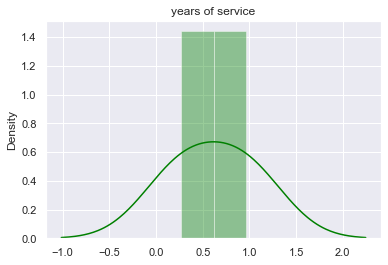

In [38]:
sns.distplot(x[0], color='green')
plt.title("years of service")
plt.show()

so we can see that all the colummn which has little of skewness present is now changed to normal distribution plot

# Feature Scaling using Standard Scaler

In [39]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(x)
x

array([[ 2.68885831e-01,  9.62915374e-01],
       [ 1.20900603e-01,  1.76699933e+00],
       [-1.28449532e+00, -1.25634534e+00],
       [ 1.46109915e+00,  2.11371205e-01],
       [ 1.55315864e+00,  1.01020622e+00],
       [-8.40053119e-01, -4.61859092e-01],
       [ 6.03379808e-01,  1.80513534e+00],
       [ 1.72997607e+00,  1.17420107e+00],
       [ 4.08142448e-01,  3.52843452e-01],
       [ 2.68885831e-01,  6.56774129e-01],
       [-6.03480739e-01,  3.70730956e-01],
       [-1.47508922e+00, -1.25376757e+00],
       [-1.70716059e+00, -1.36364922e+00],
       [-2.02223253e+00, -1.34774601e+00],
       [ 2.68885831e-01, -1.53983281e-01],
       [-1.28449532e+00,  2.83670548e-01],
       [ 4.08142448e-01, -3.00587849e-01],
       [ 1.21866709e+00, -2.05362588e-01],
       [ 6.03379808e-01,  5.27625004e-01],
       [ 1.31789249e+00,  8.87220841e-01],
       [ 7.85006224e-01, -7.82800376e-01],
       [ 1.06349813e+00, -2.38880223e-01],
       [ 1.00992197e+00, -5.91975986e-01],
       [ 3.

In [40]:
x.shape

(393, 2)

In [41]:
y.shape

(393,)

So now we have performed the standard scaling in all of our features for making a best model from the data

standarization means

mean : 0

std.dev=1

## Creating the Model for predictions

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

### Splitting the DataFrame into train_test_split
#### Testing diffrent algorithms
LINEAR REGRESSION

In [43]:
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = i)
    lr= LinearRegression( positive=True, n_jobs=2)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print(f'At random state {i},the training accuracy score is:- {r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy score is:- {r2_score(y_test,pred_test)}')
    print('\n')

At random state 1,the training accuracy score is:- 0.971908312454915
At random state 1,the testing accuracy score is:- 0.9766581752358092


At random state 2,the training accuracy score is:- 0.9729551564628285
At random state 2,the testing accuracy score is:- 0.9733595260556498


At random state 3,the training accuracy score is:- 0.9719732906983294
At random state 3,the testing accuracy score is:- 0.9770018280406072


At random state 4,the training accuracy score is:- 0.9728090813887873
At random state 4,the testing accuracy score is:- 0.9733422335606198


At random state 5,the training accuracy score is:- 0.9733009456303803
At random state 5,the testing accuracy score is:- 0.972408959410534


At random state 6,the training accuracy score is:- 0.9755431139095229
At random state 6,the testing accuracy score is:- 0.9657639634452566


At random state 7,the training accuracy score is:- 0.9728301029672956
At random state 7,the testing accuracy score is:- 0.9733983487399432


At random state

At random state 85,the training accuracy score is:- 0.9742541828338231
At random state 85,the testing accuracy score is:- 0.970099139422335


At random state 86,the training accuracy score is:- 0.9737385507730408
At random state 86,the testing accuracy score is:- 0.9710687683518903


At random state 87,the training accuracy score is:- 0.9742102413036522
At random state 87,the testing accuracy score is:- 0.9692480358427429


At random state 88,the training accuracy score is:- 0.9740621288338485
At random state 88,the testing accuracy score is:- 0.970425279120373


At random state 89,the training accuracy score is:- 0.9746555597976339
At random state 89,the testing accuracy score is:- 0.9688423508446465


At random state 90,the training accuracy score is:- 0.9727798360474383
At random state 90,the testing accuracy score is:- 0.9732930284563421


At random state 91,the training accuracy score is:- 0.971718836739815
At random state 91,the testing accuracy score is:- 0.977811926827965


At 

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=10, test_size=0.25)
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print('Result  from Linear regression model')
print('R2 score is ',r2_score(pred,y_test))
print('mean_squared_error', mean_squared_error(pred,y_test))

Result  from Linear regression model
R2 score is  0.9610628317855605
mean_squared_error 36619779.68723486


# RANDOM FOREST

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestRegressor(n_estimators=10, bootstrap=True, random_state=10)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('Result  from random_forestregressor')
print('R2 score is ',r2_score(pred,y_test))
print('mean_squared_error', mean_squared_error(pred,y_test))

Result  from random_forestregressor
R2 score is  0.9960368268604549
mean_squared_error 4026235.4409090974


# SVM REGRESSOR

In [46]:
from sklearn.svm import SVR
sv = SVR(kernel ='rbf', gamma=1, epsilon=3)
sv.fit(x_train, y_train)
pred_sv= sv.predict(x_test)
print('Result  from svm regrssor')
print('R2 score is ',r2_score(pred,y_test))
print('mean_squared_error', mean_squared_error(pred,y_test))

Result  from svm regrssor
R2 score is  0.9960368268604549
mean_squared_error 4026235.4409090974


# KNN REGRESSOR

In [47]:
from sklearn.neighbors  import KNeighborsRegressor
kn =KNeighborsRegressor(n_neighbors=7, algorithm='kd_tree', weights='distance')
kn.fit(x_train, y_train)
pred_kn= kn.predict(x_test)
print('result  from knn regressor')
print('R2 score is ',r2_score(pred,y_test))
print('mean_squared_error', mean_squared_error(pred,y_test))

result  from knn regressor
R2 score is  0.9960368268604549
mean_squared_error 4026235.4409090974


# using of Cross _validation

In [48]:
from sklearn.model_selection import cross_val_score

In [49]:
# Random Forest
cross_val_score(rf,x,y,cv=5).mean()

0.9992357472093483

In [50]:
# Linear Regression
cross_val_score(lr,x,y,cv=5).mean()

0.9725121938343566

In [51]:
# Knn Regression
cross_val_score(kn,x,y,cv=5).mean()

0.9882294742878391

In [52]:
# SVM Regression
cross_val_score(sv,x,y,cv=5).mean()

-0.07698060160328565

So accroding to the Cross validation score of all the model we can see that the best cv score is here is again for the random forest

### We are going with random forest model as it gave more accuracy while modelling
#### Hyper parameter tuning for best model using

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
#RandomForestRegressor
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,400],
             'max_depth':[2,4,6,7,8]}

In [55]:
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [56]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [2, 4, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 400]})

In [57]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 400}

In [59]:
sal_score = RandomForestRegressor(criterion='mse', max_depth=8, max_features='auto', n_estimators=400)
sal_score.fit(x_train, y_train)
pred_GCV = sal_score.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_GCV)*100)

R2_Score: 99.45992192139205


After tuning the model Random Forest Regressor, we are getting R2 score as 99% which is  very good.

# Saving the model

In [60]:
import pickle
filename='salary _predictions'
pickle.dump(kn,open(filename,'wb'))

# Conclusion & prediction by the final model

In [61]:
import numpy as np
a =np.array(y_test)
predicted=np.array(kn.predict(x_test))
df_sal=pd.DataFrame({'Orginal':a,'Predicted':predicted}, index=range(len(a)))
df_sal

,Orginal,Predicted
0,108200,107792.742392
1,110515,112738.961592
2,88600,90313.442778
3,138771,137955.043786
4,134800,133764.952256
...,...,...
94,74000,74621.966122
95,72500,72500.000000
96,137317,135861.017932
97,166024,158175.371830
